                name    nickname  wins  losses  draws  height_cm  \
0    Robert Drysdale         NaN     7       0      0     190.50   
1  Daniel McWilliams  The Animal    15      37      0     185.42   
2         Dan Molina         NaN    13       9      0     177.80   
3          Paul Ruiz         NaN     7       4      0     167.64   
4    Collin Huckbody      All In     8       2      0     190.50   

   weight_in_kg  reach_in_cm    stance date_of_birth  \
0         92.99          NaN  Orthodox    05-10-1981   
1         83.91          NaN       NaN           NaN   
2         97.98          NaN       NaN           NaN   
3         61.23          NaN       NaN           NaN   
4         83.91       193.04  Orthodox    29-09-1994   

   significant_strikes_landed_per_minute  significant_striking_accuracy  \
0                                   0.00                              0   
1                                   3.36                             77   
2                            

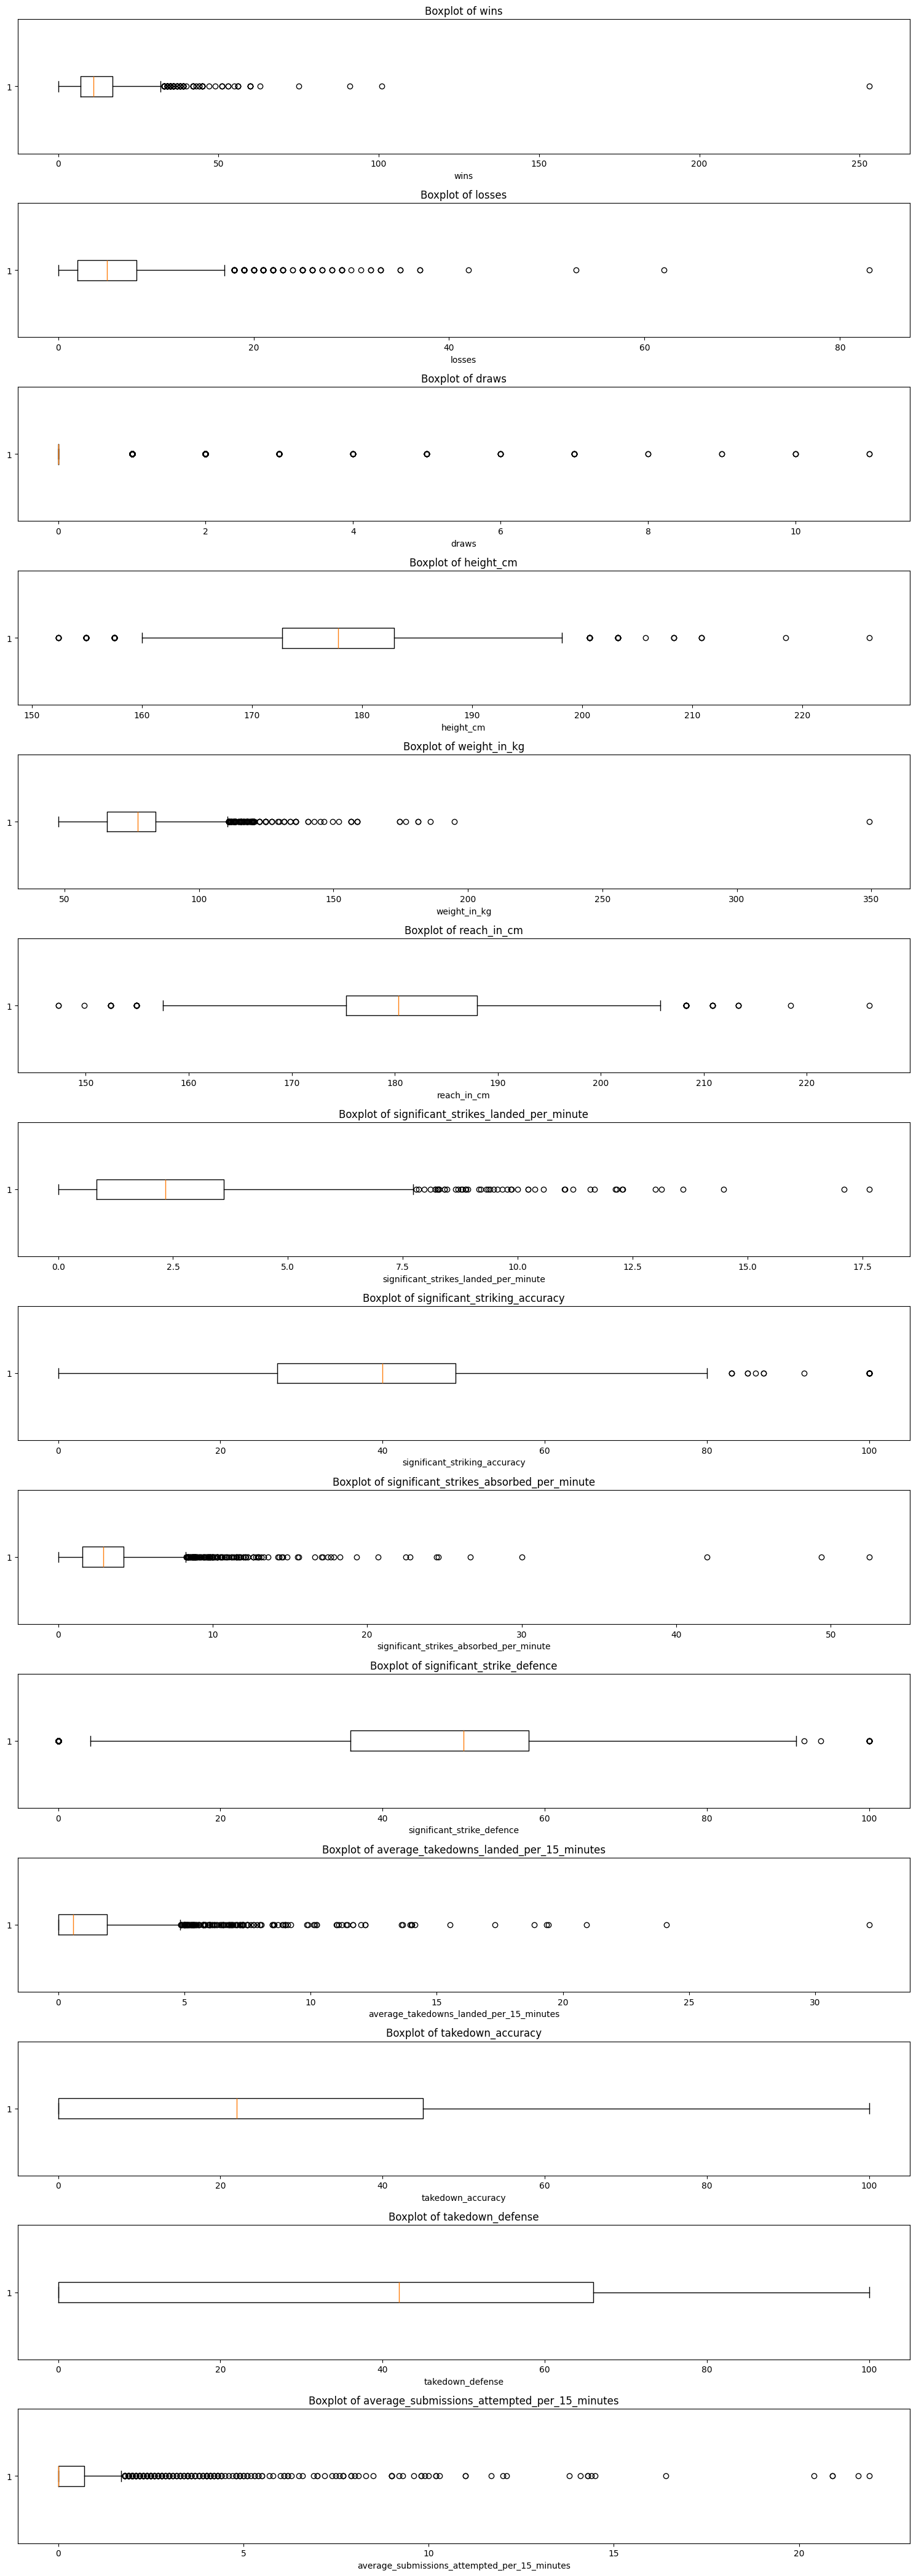

 
 
 after outlier detection and removal 
 
 


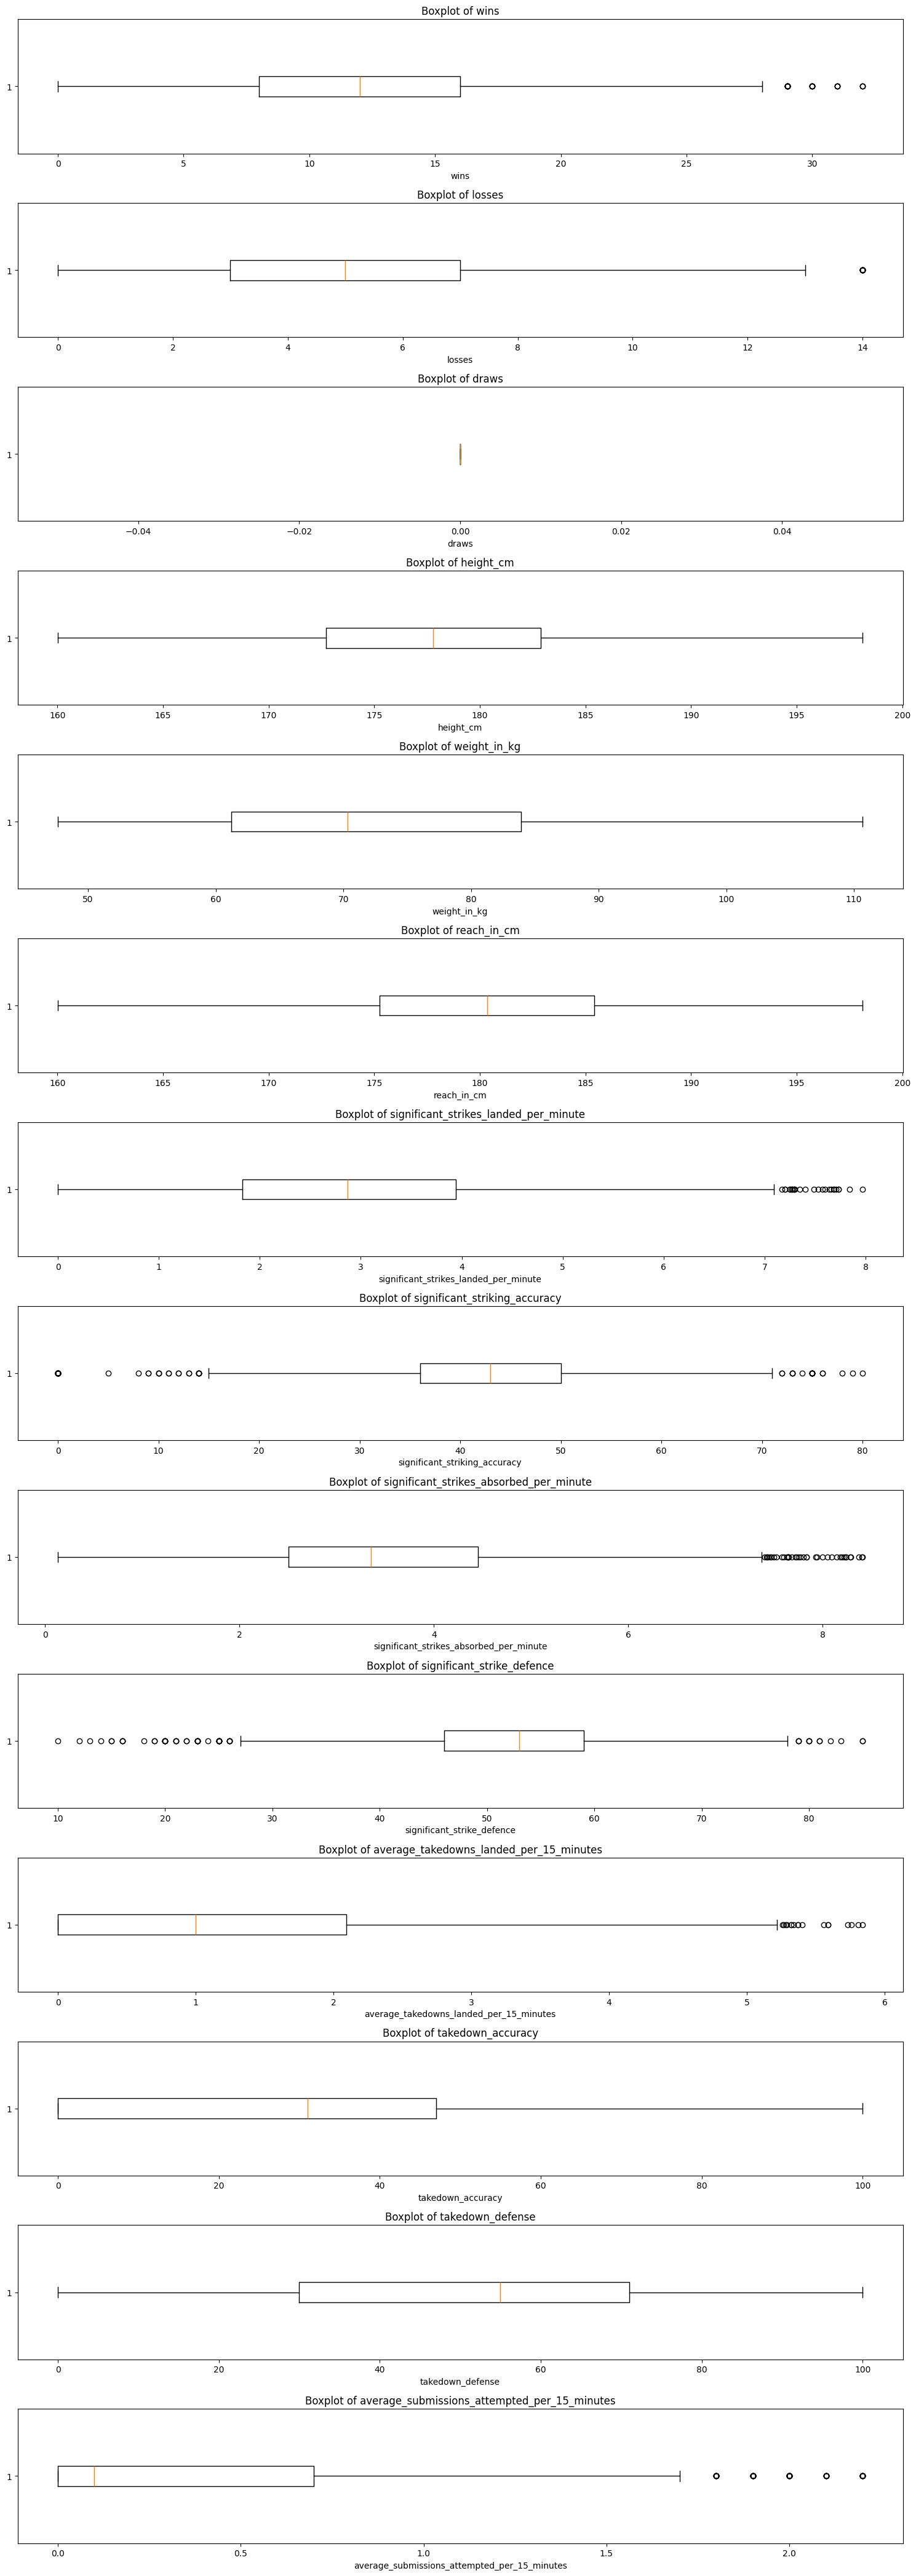

In [79]:

import numpy as np

from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/ufc_fighter_statistic.csv')

print(df.head())
print(df.info())
print(df.describe())
print("\n")

df = df.drop(columns=['nickname'])
df = df.drop_duplicates()

num_cols = df.select_dtypes(include=['float64','int64']).columns

median_height = df['height_cm'].median()
df['height_cm'] = df['height_cm'].fillna(median_height)

median_weight = df['weight_in_kg'].median()
df['weight_in_kg'] = df['weight_in_kg'].fillna(median_weight)

df['reach_in_cm'] = df['reach_in_cm'].fillna(df['height_cm'])
#got a better way to do it after the bootcamp xd #


# gpt
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], format='%d-%m-%Y', errors='coerce')
today = pd.Timestamp.today()
df['age'] = (today - df['date_of_birth']).dt.days // 365
print(df[['date_of_birth', 'age']].head())
#gpt

df = df.drop(columns=['date_of_birth'])

median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)

mode_stance = df['stance'].mode()[0]
df['stance'] = df['stance'].fillna(mode_stance)



#iska kaam ho gaya
#print(df.isnull().sum())


plt.figure(figsize=(15, len(num_cols)*3))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# before outlier detection and removal
print(" \n \n after outlier detection and removal \n \n ")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


plt.figure(figsize=(15, len(num_cols)*3))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

#after outlier detection and removal

df['win_ratio'] = df['wins'] / (df['wins'] + df['losses'])
df['loss_ratio'] = 1 - df['win_ratio']
df = df.reset_index(drop=True)





In [80]:
print(df.head())

print(df[['wins', 'losses', 'win_ratio', 'loss_ratio']].head())

                 name  wins  losses  draws  height_cm  weight_in_kg  \
0    Niklas Backstrom    11       3      0     185.42         65.77   
1  Kaynan Kruschewsky    15       2      0     182.88         70.31   
2         Ryan Thomas    20       8      0     182.88         77.11   
3           Ryan Hall     9       2      0     177.80         65.77   
4       Dustin Kimura    11       3      0     170.18         61.23   

   reach_in_cm    stance  significant_strikes_landed_per_minute  \
0       185.42  Orthodox                                   1.12   
1       185.42  Orthodox                                   5.08   
2       182.88  Orthodox                                   2.01   
3       177.80  Southpaw                                   2.38   
4       180.34  Orthodox                                   1.33   

   significant_striking_accuracy  significant_strikes_absorbed_per_minute  \
0                             41                                     3.65   
1               

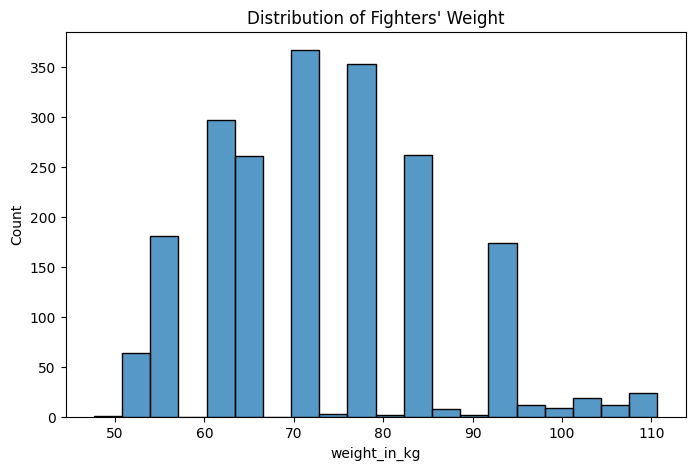

In [81]:
plt.figure(figsize=(8,5))
sns.histplot(df["weight_in_kg"], bins=20)
plt.title("Distribution of Fighters' Weight")
plt.show()


Most fighters weigh between  65kg and 85kg.

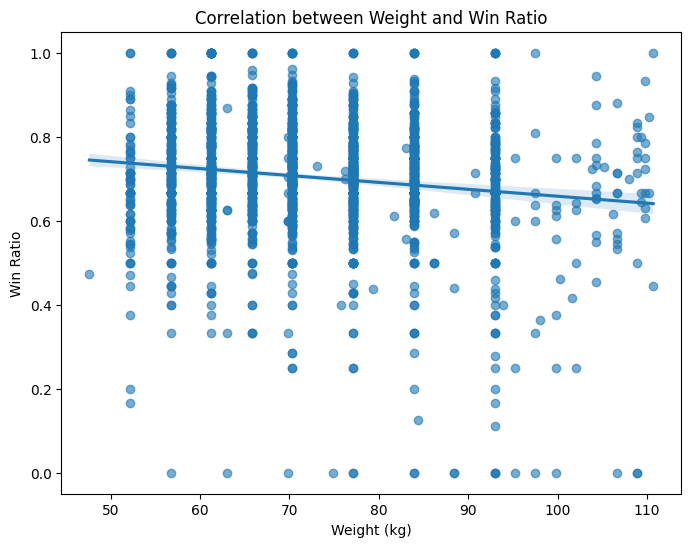

In [82]:
plt.figure(figsize=(8,6))
sns.regplot(x='weight_in_kg', y='win_ratio', data=df, scatter_kws={'alpha':0.6})
plt.title("Correlation between Weight and Win Ratio")
plt.xlabel("Weight (kg)")
plt.ylabel("Win Ratio")
plt.show()

The regression line slopes downward slightly-This means that as weight increases, the win ratio tends to decrease a bit on average.

There’s a wide spread of points for every weight value-
This means weight isn’t a strong predictor of win ratio fighters at the same weight can have very different win ratios.

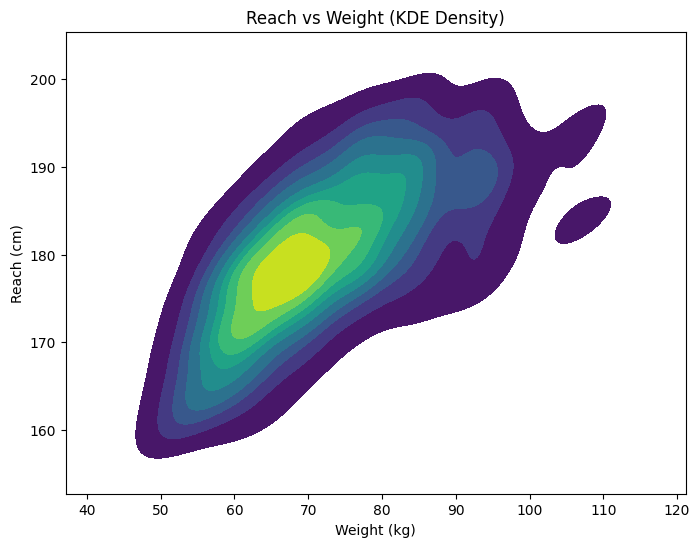

In [83]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    x='weight_in_kg',
    y='reach_in_cm',
    data=df,
    fill=True,
    cmap='viridis',
    thresh=0.05
)
plt.title("Reach vs Weight (KDE Density)")
plt.xlabel("Weight (kg)")
plt.ylabel("Reach (cm)")
plt.show()


Positive Correlation

As weight increases, reach also increases which also means that height increase
progressively

Most Fighters Cluster Around 60–80kg, 175–185cm

The yellow/green area shows that the majority of fighters are in this weight and reach range.


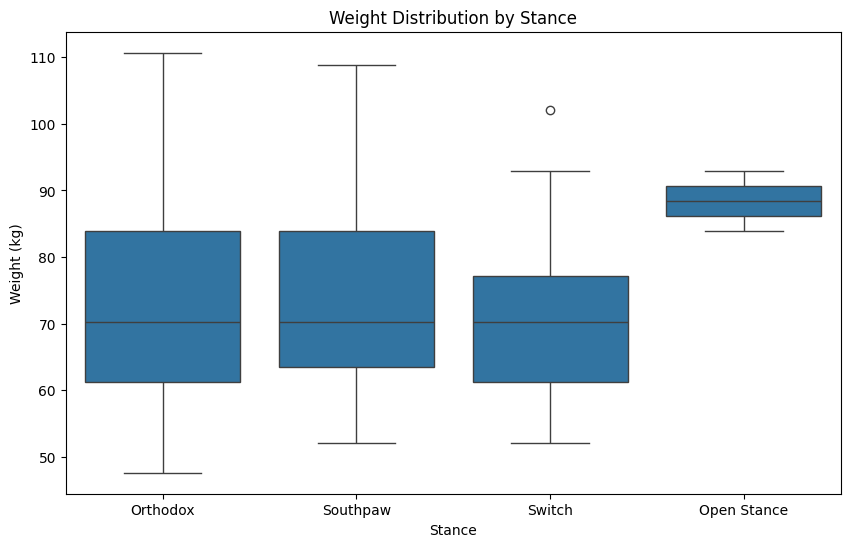

In [84]:
plt.figure(figsize=(10,6))
sns.boxplot(x='stance', y='weight_in_kg', data=df)
plt.title("Weight Distribution by Stance")
plt.xlabel("Stance")
plt.ylabel("Weight (kg)")
plt.show()

Orthodox and Southpaw are dominant stances:
They have a similar weight range (~50–110 kg).
Both stances have a wide spread, indicating fighters of all weight classes use these stances.

Open stance:
Very small sample size (fewer fighters).
Fighters in this stance tend to be heavier, clustered around 85–93 kg.

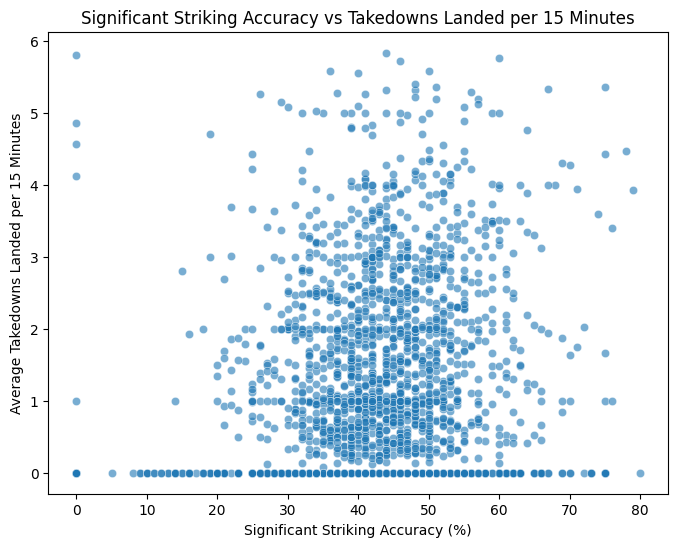

In [85]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='significant_striking_accuracy',
    y='average_takedowns_landed_per_15_minutes',
    data=df,
    alpha=0.6
)
plt.title("Significant Striking Accuracy vs Takedowns Landed per 15 Minutes")
plt.xlabel("Significant Striking Accuracy (%)")
plt.ylabel("Average Takedowns Landed per 15 Minutes")
plt.show()